# California Housing Regression
## Python Mini-Project
### Ernesto Gonzales, MSDA

In [3]:
#Import libraries

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading datasaet as pandas DataFrame

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)
X.head()

Shape of X: (20640, 8)
Shape of Y: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
#Spliting data into train/test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
#Building a pipeline with scaling and model

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())])

pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [11]:
# Predictions

y_pred = pipeline.predict(X_test)
y_pred[:5]

array([0.71912284, 1.76401657, 2.70965883, 2.83892593, 2.60465725])

In [9]:
# Model Evaluation (MAE, RMSE)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.5332001304956565
Root Mean Squared Error: 0.7455813830127764


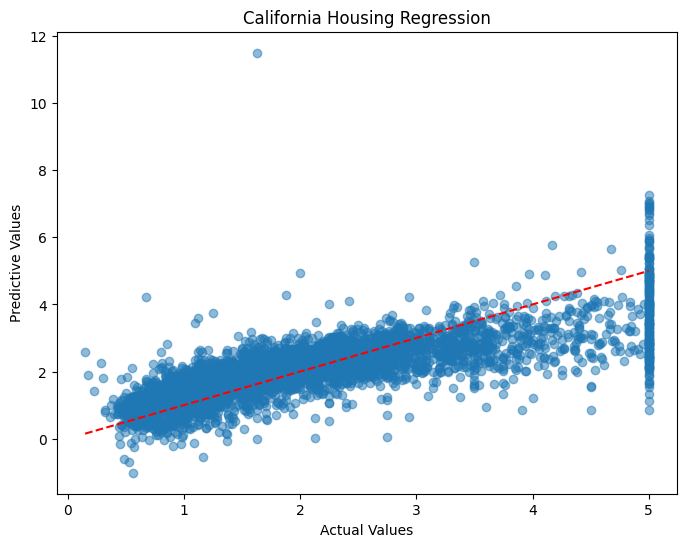

In [12]:
# Results Visualization

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predictive Values")
plt.title("California Housing Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--") #Reference line
plt.show()

In [15]:
#Ridge Regression

ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0)) #regularization strenght
     ])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_ridge[:5]

array([0.71947224, 1.76384666, 2.709309  , 2.83875678, 2.60417736])

In [18]:
# Model Evaluation

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_absolute_error(y_test, y_pred_ridge))

print("Ridge Mean Absolute Error:", mae_ridge)
print("Ridge Root Mean Squared Error:", rmse_ridge)

Ridge Mean Absolute Error: 0.5331931195789734
Ridge Root Mean Squared Error: 0.7302007392347487


In [25]:
# Comparison
import pandas as pd
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "MAE": [mae, mae_ridge],
    "RMSE": [rmse, rmse_ridge]})
    
    
results

,Model,MAE,RMSE
0,Linear Regression,0.533200,0.745581
1,Ridge Regression,0.533193,0.730201


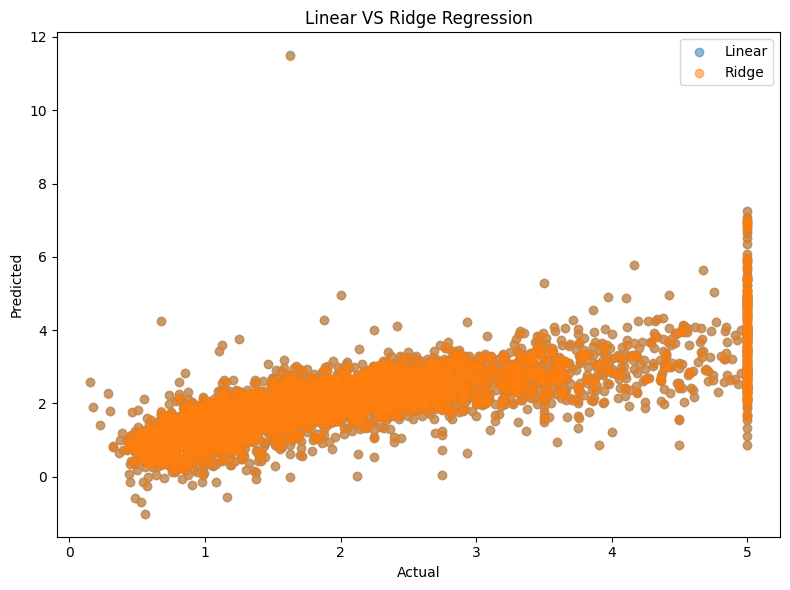

In [40]:
# Plot Comparison

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Linear")
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label="Ridge")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear VS Ridge Regression")
plt.legend()
plt.tight_layout()
plt.savefig("../docs/california_regression_comparison.png", dpi=150)
plt.show()

In [35]:
!pip install tabulate

In [38]:
from IPython.display import Markdown, display

md_table = results.to_markdown(index=False, floatfmt=".4f")
display(Markdown("### Model Comparsion\n" + md_table))


### Model Comparsion
| Model             |    MAE |   RMSE |
|:------------------|-------:|-------:|
| Linear Regression | 0.5332 | 0.7456 |
| Ridge Regression  | 0.5332 | 0.7302 |

In [39]:
# Saving Markdown to docs

docs_path = "../docs/california_regression_results.md"
with open(docs_path, "w", encoding="utf-8") as f:
    f.write("### Model Comparison\n\n")
    f.write(results.to_markdown(index=False, floatfmt=".4f"))
print(f"Saved to {docs_path}")

Saved to ../docs/california_regression_results.md
